In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Reading the data

In [15]:
df = pd.read_csv("Train.csv")

In [33]:
df_test = pd.read_csv("Test.csv")

# 0 --> Bad review , 1 --> Good review

In [34]:
df_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [16]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [18]:
df["text"][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [20]:
nlp = spacy.load("en_core_web_sm")

# Preprocessing the Text

In [23]:
def preprocess(texts):
    doc = nlp(texts)
    
    clean_words = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num]
    return " ".join(clean_words)

# Applying preprocess function on train dataframe ( df )

In [26]:
df["new_text"] = df["text"].apply(preprocess)

In [28]:
df["new_text"][0]

'grew b. watching loving Thunderbirds mates school watched played Thunderbirds school lunch school wanted Virgil Scott wanted Alan Counting art form took children movie hoping glimpse loved child bitterly disappointing high point snappy theme tune compare original score Thunderbirds Thankfully early Saturday mornings television channel plays reruns series Gerry Anderson wife created Jonatha Frakes hand directors chair version completely hopeless waste film Utter rubbish CGI remake acceptable replacing marionettes Homo sapiens subsp sapiens huge error judgment'

# Applying preprocess function on test dataframe ( df )

In [36]:
df_test["new_test_text"] = df_test["text"].apply(preprocess)

In [30]:
X_train = df["new_text"]

In [31]:
y_train = df["label"]

In [38]:
X_test = df_test["new_test_text"]

In [39]:
y_test = df_test["label"]

# a) SVC

In [29]:
operations = [("tfidf",TfidfVectorizer()),("svc",SVC())]

In [32]:
svc_pipe = Pipeline(operations)

In [40]:
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [41]:
y_pred = svc_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      2495
           1       0.89      0.91      0.90      2505

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



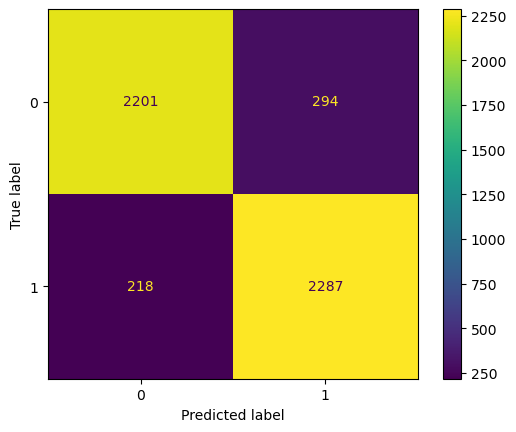

In [42]:
print(classification_report(y_test,y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=svc_pipe.classes_)
matrix.plot();

# b) Random Forest

In [43]:
operations = [("tfidf",TfidfVectorizer()),("rf",RandomForestClassifier())]

In [44]:
rf_pipe = Pipeline(operations)

In [45]:
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [46]:
y_pred = rf_pipe.predict(X_test) 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2495
           1       0.86      0.86      0.86      2505

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



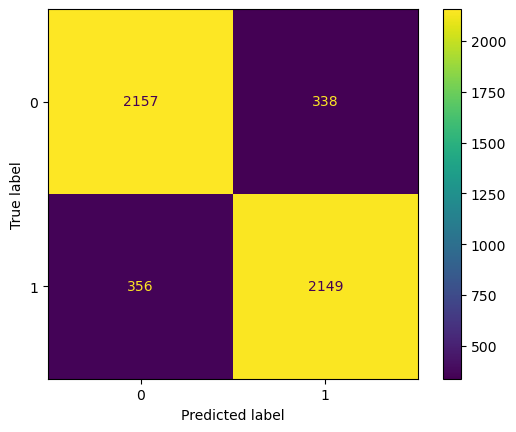

In [47]:
print(classification_report(y_test,y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=rf_pipe.classes_)
matrix.plot();

# c) Gradient Boosting

In [49]:
operations = [("tfidf",TfidfVectorizer()),("gb",GradientBoostingClassifier())]

In [50]:
gb_pipe = Pipeline(operations) 

In [51]:
gb_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('gb', GradientBoostingClassifier())])

In [52]:
y_pred = gb_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2495
           1       0.77      0.87      0.81      2505

    accuracy                           0.80      5000
   macro avg       0.81      0.80      0.80      5000
weighted avg       0.81      0.80      0.80      5000



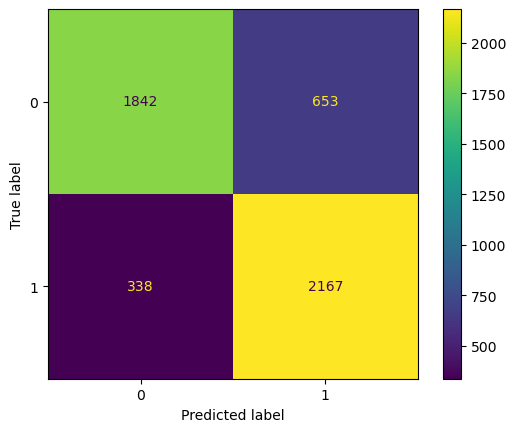

In [53]:
print(classification_report(y_test,y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=gb_pipe.classes_)
matrix.plot();

# d) KNN

In [54]:
operations = [("tfidf",TfidfVectorizer()),("knn",KNeighborsClassifier())]

In [55]:
knn_pipe = Pipeline(operations)

In [56]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('knn', KNeighborsClassifier())])

In [57]:
y_pred = knn_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2495
           1       0.75      0.81      0.78      2505

    accuracy                           0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000



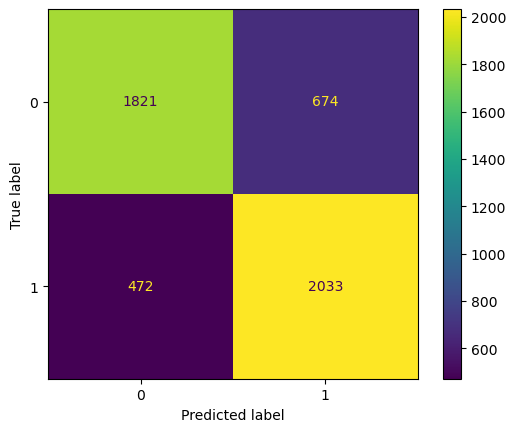

In [58]:
print(classification_report(y_test,y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=knn_pipe.classes_)
matrix.plot();

# e) Logistic Reg

In [59]:
operations = [("tfidf",TfidfVectorizer()),("lr",LogisticRegression())]  

In [60]:
lr_pipe = Pipeline(operations)

In [61]:
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [62]:
y_pred = lr_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2495
           1       0.89      0.91      0.90      2505

    accuracy                           0.90      5000
   macro avg       0.90      0.89      0.89      5000
weighted avg       0.90      0.90      0.89      5000



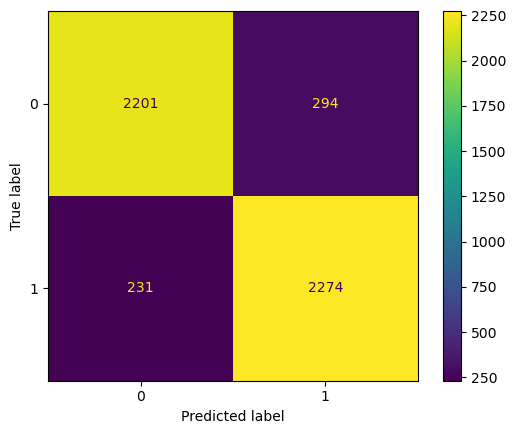

In [63]:
print(classification_report(y_test,y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=lr_pipe.classes_)
matrix.plot();

# f) Multinomial NB  

In [64]:
operations = [("tfidf",TfidfVectorizer()),("nb",MultinomialNB())]  

In [65]:
nb_pipe = Pipeline(operations)

In [66]:
nb_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [67]:
y_pred = nb_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2495
           1       0.88      0.86      0.87      2505

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



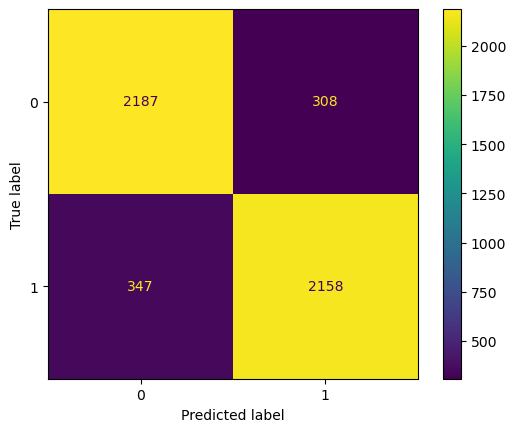

In [68]:
print(classification_report(y_test,y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=nb_pipe.classes_)
matrix.plot();

# Checking the above models on a review of Animal Movie 

In [71]:
doc = nlp("Ranbir personal show with no story, no logic and absurd action scenes. Anil Kapoor and boby are wasted totally, the film story is from the age where there are no law and enforcement exists you can do whatever you want to either it's your own country or you are in foreign kill as many people as want .... to make a century of corpses is like a piece of cake. Zero emotions and no chemistry between father and son....not even close to a worst family drama and yes it's not a family movie strong language lot of unwanted smooching and obscenity. Spend 3.5 hrs with your father or if you are father spend quality time with your son and save yourself from this disaster.")
a = " "
new_words = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num]
result = a.join(new_words)  

In [73]:
type(result)

str

In [74]:
review = pd.Series(result)

In [75]:
svc_pipe.predict(review)

array([0])

In [76]:
rf_pipe.predict(review)

array([0])

In [77]:
gb_pipe.predict(review)

array([0])

In [78]:
knn_pipe.predict(review)

array([1])

In [79]:
lr_pipe.predict(review)

array([0])

In [80]:
nb_pipe.predict(review)

array([0])